## Theory: 

A/B testing is a powerful method to compare two or more variants of a treatment (e.g., a webpage, an algorithm, etc.) to determine which one performs better. Here's a comprehensive guide on how to conduct A/B testing, including A/A testing, practical significance, guardrail metrics, network effects, and considerations for double-sided markets.

### 1. **Define the Problem and Goals**
   - **Example:** Your goal is to increase the average revenue per user (ARPU).
   - **Primary Metric:** Average Revenue per User (ARPU).
   - **Secondary Metrics:** Conversion Rate (CR), Time Spent on Page, etc.
   - **Guardrail Metrics:** Metrics that you do not want to worsen (e.g., Bounce Rate, Cart Abandonment Rate).

### 2. **Conduct A/A Testing**
   - **Purpose:** A/A testing is used to ensure that your experiment setup is not biased and that randomization works as expected.
   - **Steps:**
     1. **Split your traffic:** Randomly divide users into two groups (A1 and A2), both seeing the current checkout page.
     2. **Run the test:** Measure the metrics over a period.
     3. **Check for Bias:** If both groups A1 and A2 show similar results, your randomization process is likely unbiased.
   - **Metrics Analysis:** Conduct hypothesis testing (t-test) to compare the metrics from A1 and A2. The p-value should be high (usually > 0.05), indicating no significant difference.

### 3. **Design the A/B Test**
   - **Variant Creation:** Develop an alternative checkout page (Variant B).
   - **Traffic Allocation:** Split users randomly into two groups:
     - **Group A:** Control group sees the original page.
     - **Group B:** Treatment group sees the new page.
   - **Sample Size Calculation:** Determine the required sample size using the following inputs:
     - **Baseline Conversion Rate (CR):** From historical data.
     - **Minimum Detectable Effect (MDE):** The smallest improvement you want to detect (e.g., a 2% increase in CR).
     - **Statistical Power (1 - β):** Typically set at 0.8 (80%).
     - **Significance Level (α):** Typically set at 0.05.

   - **Formula:** Mentioned Below

### 4. **Set Alpha, Beta, and Practical Significance**
   - **Alpha (α):** The probability of a Type I error (false positive). Set it to 0.05 for a 5% significance level.
   - **Beta (β):** The probability of a Type II error (false negative). Commonly set to 0.2, giving 80% power.
   - **Practical Significance:** Define the minimum effect size that is meaningful for your business (e.g., a 1% increase in ARPU might be financially significant).

### 5. **Run the A/B Test**
   - **Monitor Metrics:** Track both primary and secondary metrics in real-time.
   - **Guardrail Metrics:** Ensure that guardrail metrics (e.g., bounce rate) do not degrade significantly.
   - **Network Effects:** If your platform has network effects (e.g., user interactions in a social network), account for potential spillovers where changes in one group affect the other.
   - **Double-Sided Market Considerations:** In markets with two user groups (e.g., buyers and sellers), ensure that changes on one side do not negatively impact the other.

### 6. **Analyze the Results**
   - **Hypothesis Testing:** Use a t-test or z-test to determine if the difference between Group A and Group B is statistically significant.
     - **Null Hypothesis (H0):** There is no difference in ARPU between the original and new checkout pages.
     - **Alternative Hypothesis (H1):** There is a difference in ARPU.
   - **Confidence Interval:** Calculate the confidence interval for the difference in ARPU to understand the range of possible outcomes.
   - **P-Value:** Compare the p-value to α (0.05). If p < 0.05, reject the null hypothesis, indicating that the difference is statistically significant.
   - **Practical Significance:** Check if the observed difference meets the threshold for practical significance.

### 7. **Consider Network and Market Effects**
   - **Network Effects:** If applicable, check if the test influenced user interactions beyond the test group, which could bias results.
   - **Double-Sided Market:** Ensure that changes beneficial to one side (e.g., buyers) do not negatively affect the other side (e.g., sellers).

### 8. **Decide and Implement**
   - **Go/No-Go Decision:** Based on statistical and practical significance, decide whether to implement the new variant.
   - **Rollout Plan:** If Variant B is successful, decide on a gradual or full rollout.

### 9. **Document and Share Findings**
   - **Documentation:** Record the hypothesis, methodology, results, and decisions.
   - **Presentation:** Share the results with stakeholders, emphasizing both the statistical significance and practical implications.

### 10. **Post-Experiment Monitoring**
   - **Monitor Performance:** After rolling out the winning variant, continue to monitor key metrics to ensure that the observed improvements persist over time.

In [1]:
import os
import json
import numpy as np
import pandas as pd

def load_df(csv_path='/kaggle/input/ga-customer-revenue-prediction/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = pd.json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

print(os.listdir("../input"))

['ga-customer-revenue-prediction']


In [2]:
%%time
df_small = load_df(nrows=20000)

Loaded train.csv. Shape: (20000, 54)
CPU times: user 2.16 s, sys: 198 ms, total: 2.36 s
Wall time: 2.74 s


In [3]:
import pandas as pd

# Load the dataset (assuming it's downloaded and extracted)
df = load_df()

df_raw = df.copy()

# Display basic information
display(df.info())
display(df.head())

# Convert transactionRevenue to float and fill NaNs with 0
df['totals.transactionRevenue'] = df['totals.transactionRevenue'].astype(float).fillna(0)

# Create a new column for revenue in USD
df['revenue'] = df['totals.transactionRevenue'] / 1e6  # Convert micro-units to USD

Loaded train.csv. Shape: (903653, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   channelGrouping                                    903653 non-null  object
 1   date                                               903653 non-null  int64 
 2   fullVisitorId                                      903653 non-null  object
 3   sessionId                                          903653 non-null  object
 4   socialEngagementType                               903653 non-null  object
 5   visitId                                            903653 non-null  int64 
 6   visitNumber                                        903653 non-null  int64 
 7   visitStartTime                                     903653 non-null  int64 
 8   device.browser                                

None

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df['geoNetwork.city'].value_counts().head()

geoNetwork.city
not available in demo dataset    508229
Mountain View                     40884
(not set)                         34262
New York                          26371
San Francisco                     20329
Name: count, dtype: int64

In [5]:
df_analyze = df[df['geoNetwork.city'].isin(['Mountain View', 'San Francisco'])].copy()

In [6]:
from scipy.stats import ttest_ind

# Randomly split the data into two groups
group_A1 = df_analyze.sample(frac=0.5, random_state=1)
group_A2 = df_analyze.drop(group_A1.index)

# Calculate mean revenue for both groups
mean_A1 = group_A1['revenue'].mean()
mean_A2 = group_A2['revenue'].mean()

# Perform a t-test
t_stat, p_value = ttest_ind(group_A1['revenue'], group_A2['revenue'], equal_var=False)

print(f"Mean Revenue Group A1: {mean_A1}")
print(f"Mean Revenue Group A2: {mean_A2}")
print(f"P-Value: {p_value}")

# Check if p-value > 0.05
if p_value > 0.05:
    print("No significant difference between A1 and A2. Randomization is working.")
else:
    print("Significant difference found. Randomization may be biased.")

Mean Revenue Group A1: 3.871235378683918
Mean Revenue Group A2: 3.5447645963341716
P-Value: 0.5222025728626474
No significant difference between A1 and A2. Randomization is working.


In [7]:
import numpy as np

# Create a random binary flag for variant B (1 means user sees the new variant)
df_analyze['variant_B'] = (df_analyze['geoNetwork.city']=='San Francisco')

# Split data into control (A) and treatment (B) groups
control_group = df_analyze[df_analyze['variant_B']]
treatment_group = df_analyze[~df_analyze['variant_B']]

In [8]:
import statsmodels.stats.api as sms

# Baseline conversion rate (from historical data)
baseline_cr = 0.01  # Example value

# Minimum Detectable Effect (MDE)
mde = 0.002  # 2% increase in conversion rate

# Significance level (alpha)
alpha = 0.05

# Power (1 - beta)
power = 0.8

# Calculate sample size
sample_size = sms.NormalIndPower().solve_power(
    effect_size=sms.proportion_effectsize(baseline_cr, baseline_cr + mde),
    power=power, alpha=alpha, ratio=1)
print(f"Required sample size per group: {int(sample_size)}")

Required sample size per group: 42606


In [9]:
# Calculate mean revenue for both groups
mean_control = control_group['revenue'].mean()
mean_treatment = treatment_group['revenue'].mean()

# Perform a t-test
t_stat, p_value = ttest_ind(control_group['revenue'], treatment_group['revenue'], equal_var=False)

print(f"Mean Revenue Control Group: {mean_control}")
print(f"Mean Revenue Treatment Group: {mean_treatment}")
print(f"P-Value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("Significant difference detected between control and treatment.")
else:
    print("No significant difference detected between control and treatment.")

Mean Revenue Control Group: 4.962071916965911
Mean Revenue Treatment Group: 3.0844261813912532
P-Value: 0.0020743849379079153
Significant difference detected between control and treatment.


In [10]:
# Define practical significance threshold (e.g., $1 increase in ARPU)
practical_threshold = 1.0

# Calculate the observed effect size
observed_difference = mean_treatment - mean_control

print(f"Observed Difference: {observed_difference}")

if observed_difference > practical_threshold:
    print("The observed difference is practically significant.")
else:
    print("The observed difference is not practically significant.")

Observed Difference: -1.8776457355746579
The observed difference is not practically significant.


The minimum sample size calculation is a crucial step in designing an A/B test (or any hypothesis test) to ensure that the test has enough power to detect a true effect, if one exists. Here's how the minimum sample size is calculated:

### **Key Concepts**

1. **Baseline Conversion Rate (CR₀):**
   - The existing conversion rate or metric value before any changes. For example, if 10% of users currently convert, then CR₀ = 0.10.

2. **Minimum Detectable Effect (MDE):**
   - The smallest change in the metric that you want to be able to detect with statistical significance. For example, if you want to detect at least a 2% increase in conversion, then MDE = 0.02.

3. **Significance Level (α):**
   - The probability of rejecting the null hypothesis when it is actually true (Type I error). Commonly set at 0.05, which corresponds to a 5% chance of a false positive.

4. **Statistical Power (1 - β):**
   - The probability of correctly rejecting the null hypothesis when it is false (i.e., detecting a true effect). A power of 0.8 (80%) is commonly used.

5. **Effect Size:**
   - A standardized measure of the difference between the control and treatment groups. It is calculated using the baseline conversion rate and the minimum detectable effect.

### **Effect Size Calculation**

The effect size for a proportion (like a conversion rate) is calculated using the formula:

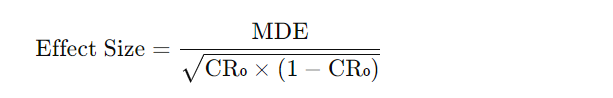

### **Sample Size Calculation Formula**

The sample size per group in an A/B test can be calculated using the following formula:

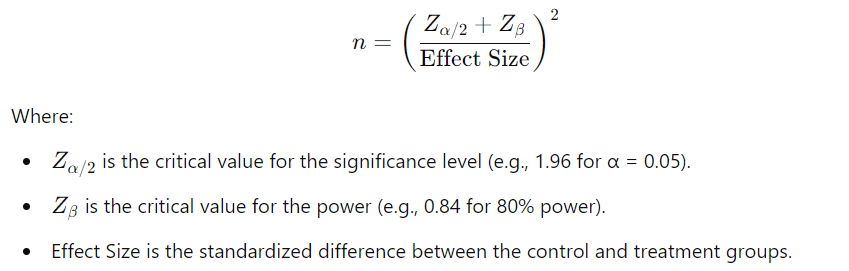


This will output the minimum sample size required for each group (control and treatment) to detect the specified MDE with the given power and significance level.

In [11]:
import statsmodels.stats.api as sms

# Define the parameters
baseline_cr = 0.10  # Baseline conversion rate (CR₀)
mde = 0.02  # Minimum Detectable Effect (MDE)
alpha = 0.05  # Significance level
power = 0.8  # Power

# Calculate the effect size
effect_size = sms.proportion_effectsize(baseline_cr, baseline_cr + mde)

# Calculate the required sample size
sample_size = sms.NormalIndPower().solve_power(effect_size=effect_size, 
                                               power=power, 
                                               alpha=alpha, 
                                               ratio=1)  # Assuming equal-sized groups

print(f"Required sample size per group: {int(sample_size)}")

Required sample size per group: 3834


### **Interpretation**

- **Why is sample size important?** If your sample size is too small, your test might not detect a true difference (leading to a Type II error). If it’s too large, you may waste resources or detect insignificant differences as statistically significant.
  
- **What affects sample size?** Higher baseline conversion rates, smaller detectable effects, lower significance levels, and higher power all increase the required sample size.

Understanding and correctly calculating the minimum sample size is essential to ensure that your A/B test results are reliable and actionable.